# 74. CORRELACION ENTRE VARIABLES  


Idea estadistica cuando queremos encontrar una relacion entre dos variables.\
El concepto de correlacion es una premisa basica para crear un modelo de datos, para poder llevar acabo un analisis predictivo, en el sentido que la correlacion es el factor que me permitira predecir la salida del modelo.\
Una buena correlacion entre dos variables sugiere que existe algun tipo de dependencia entre ellas, si cambia alguna el cambio se vera reflejado tambien en la otra. La Correlacion no es mas que una relacion matematica que se establece entre dos variables debido a su naturaleza de relacion matematica. \ 
¿Como podemos catgorizar el grado de correlacion? \
Para ello existe el "COEFICIENTE DE CORRELACION DE PEARSON". \
Una correlacion fuerte sugiere que existe algun tipo de relacion que se puede usar para crear un modelo predictivo, si tenemos una variable que podemos medir y otra que podemos inferir en base a una correlacion, significa que nos serviria para crear un modelo. 

In [1]:
import pandas as pd 

In [48]:
data_ads = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/ads/Advertising.csv")

In [3]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [5]:
import numpy as np 

In [8]:
data_ads["Corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))
#Tenemos como se separa cada uno de los numeros del promedio de tv y de las ventas respectivamente. 
#El coeficiente de correlacion mide como nos alejamos de los extremos, si estamos muy cerca o no de -1 y 1 o entorno a 0. 
#esto solo es el numerador. 

In [10]:
data_ads.head() 

,TV,Radio,Newspaper,Sales,Corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [16]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"])) **2

In [17]:
data_ads.head()

,TV,Radio,Newspaper,Sales,Corrn,corr_1,corr2,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006,1139.568806


In [14]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"])) **2

In [19]:
data_ads.head()

,TV,Radio,Newspaper,Sales,Corrn,corr_1,corr2,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006,1139.568806


In [21]:
corr_pearson = sum(data_ads["Corrn"]) / np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [22]:
corr_pearson #Da positivo y en orden creciente, esto quiere decir que cuanto mas se gasta en publicidad para TV tambien aumentan las ventas.

0.782224424861606

In [25]:
def corr_coeff(df, Var1, Var2) : 
    df["Corrn"] = (df[Var1] - np.mean(df[Var1])) * (df[Var2] - np.mean(df[Var2]))
    df["corr1"] = (df[Var1] - np.mean(df[Var1])) **2
    df["corr2"] = (df[Var2] - np.mean(df[Var2])) **2
    corr_pearson = sum(df["Corrn"]) / np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_pearson
    
    

In [26]:
corr_coeff(data_ads, "TV", "Sales") #Sera el coeficiente de correlacion entre cualesquiera dos variables. 

0.782224424861606

In [30]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [32]:
for x in cols:
    for y in cols:
        print(x + ","+ y + ": " + str(corr_coeff(data_ads, x, y)))

TV,TV: 1.0
TV,Radio: 0.05480866446583009
TV,Newspaper: 0.056647874965056993
TV,Sales: 0.782224424861606
Radio,TV: 0.05480866446583009
Radio,Radio: 1.0
Radio,Newspaper: 0.3541037507611752
Radio,Sales: 0.5762225745710553
Newspaper,TV: 0.056647874965056993
Newspaper,Radio: 0.3541037507611752
Newspaper,Newspaper: 1.0
Newspaper,Sales: 0.22829902637616525
Sales,TV: 0.782224424861606
Sales,Radio: 0.5762225745710553
Sales,Newspaper: 0.22829902637616525
Sales,Sales: 1.0


* TV ~ TV = 1 , toda variable consigo misma esta correlacionada. 
* TV ~ RADIO = 0.05, Casi no tienen influencia. \
asi con todos los demas. \
¿Cual de los 3 medios de comunicacion tiene mayor correlacion con las ventas? \
Para entender la correlacion entre las distintas variables podemos representar una nube de puntos:

In [33]:
import matplotlib.pyplot as plt 

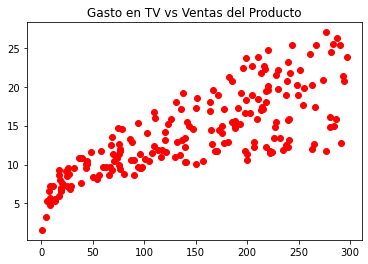

In [46]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro") #Nube de puntos. 
plt.title("Gasto en TV vs Ventas del Producto")
print()
#Vemos que al incrementar el coste de TV, incrementa el numero de ventas. 
#Caracteristica tipica de dos variables que estan correlacionadas de forma positiva. 


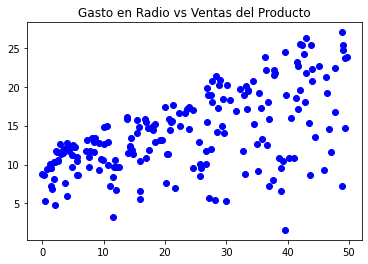

In [45]:
#Si queremos ver como contribuyen a la correlacion el resto de las variables. 
plt.plot(data_ads["Radio"], data_ads["Sales"], "bo") #Nube de puntos. 
plt.title("Gasto en Radio vs Ventas del Producto")
print()
#Esta informacion esta muy dispersa, la correlacion esta muy cerca del 0. 

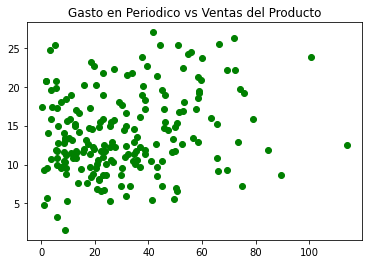

In [44]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "go") #Nube de puntos. 
plt.title("Gasto en Periodico vs Ventas del Producto")
print()
#Este no se entiende nada, el periodico y la ventas con una correlacion tan baja, apenas estariamos hablando de una coincidencia. 

In [49]:
data_ads.corr() #La matriz de correlacion. 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


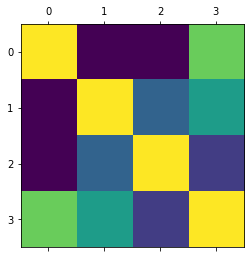

In [51]:
plt.matshow(data_ads.corr()) #con esto pintamos la matriz de correlacion en pantalla.
print() #